In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image

In [2]:
import cv2

In [73]:
img_path = '/media/hpc4_Raid/data/SYNTHIA/RAND_CITYSCAPES/RGB/train/0000000.png'

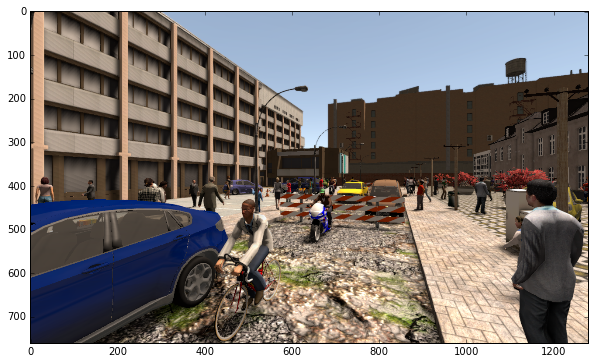

In [74]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img)
plt.show()

In [84]:
depth_path = '/media/hpc4_Raid/data/SYNTHIA/RAND_CITYSCAPES/Depth/train/0000000.png'

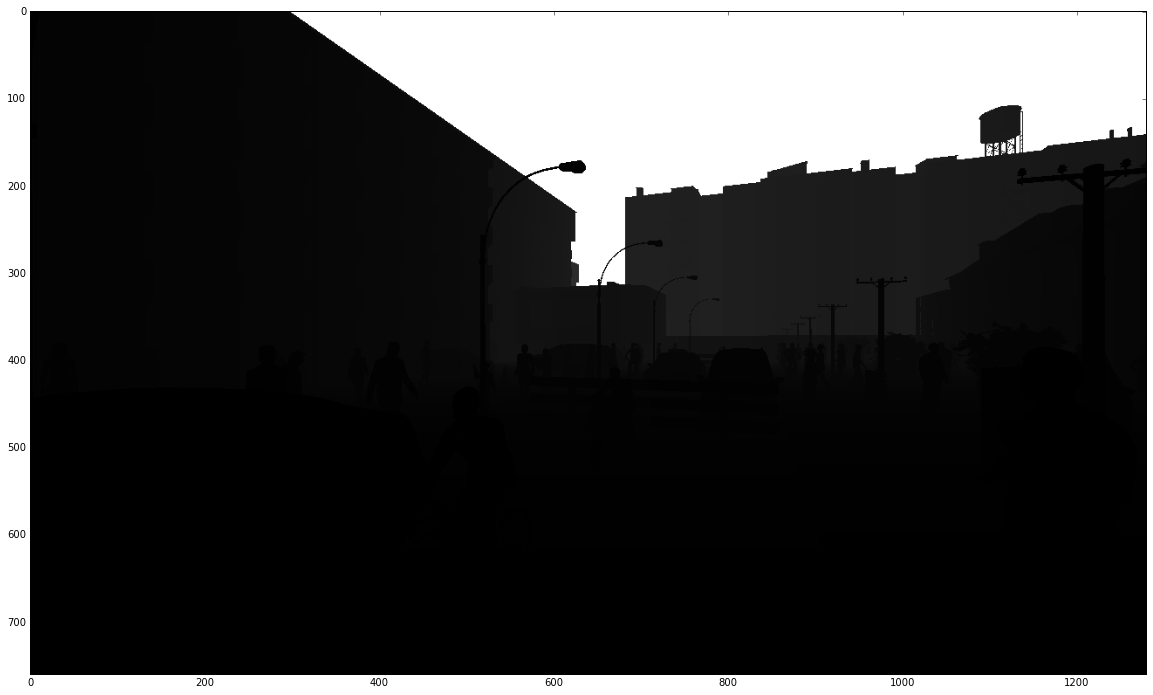

In [85]:
depth = cv2.imread(depth_path, cv2.IMREAD_UNCHANGED)
depth = depth[:, :, 0] / 100.0
plt.figure(figsize=(20,20))
plt.imshow(depth, cmap='gray')
plt.show()

In [86]:
depth.max()

655.35

In [87]:
depth.min()

1.9

In [88]:
depth.mean()

122.47841240748353

In [89]:
depth = cv2.imread(depth_path, cv2.IMREAD_UNCHANGED).astype(np.uint16)

In [90]:
depth = depth / 100.0

In [91]:
print(depth.min(), depth.mean(), depth.max())

(1.9, 122.47841240748339, 655.35)


In [79]:
depth = np.round(depth)
depth = depth.astype(np.uint16)

In [80]:
depth.min()

2

In [81]:
depth.max()

655

In [3]:
cv2.imwrite('test_depth.png', depth)

NameError: name 'depth' is not defined

In [83]:
tmp = cv2.imread('test_depth.png', cv2.IMREAD_UNCHANGED)

In [84]:
tmp.shape

(760, 1280)

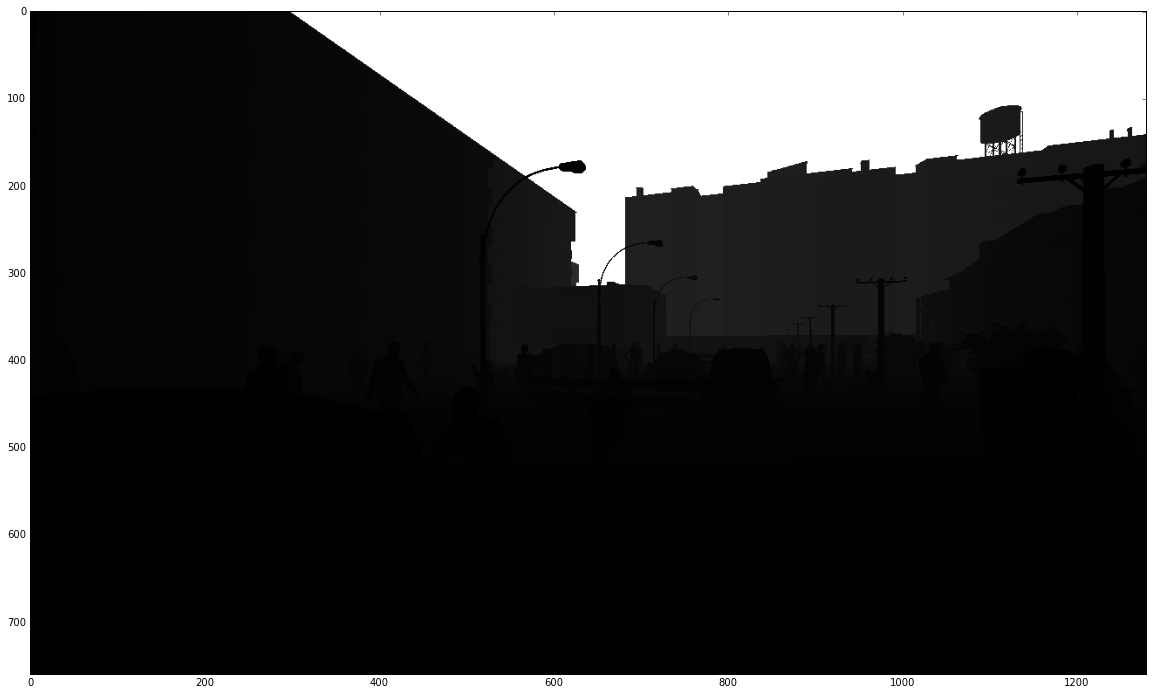

In [85]:
plt.figure(figsize=(20,20))
plt.imshow(tmp, cmap='gray')
plt.show()

In [86]:
tmp.max()

655

In [87]:
tmp.min()

2

In [89]:
tmp2 = cv2.resize(tmp, (512, 304), interpolation=cv2.INTER_CUBIC) 

In [91]:
tmp2.max()

655

In [92]:
tmp2.min()

2

In [70]:
tmp2.shape

(304, 512)

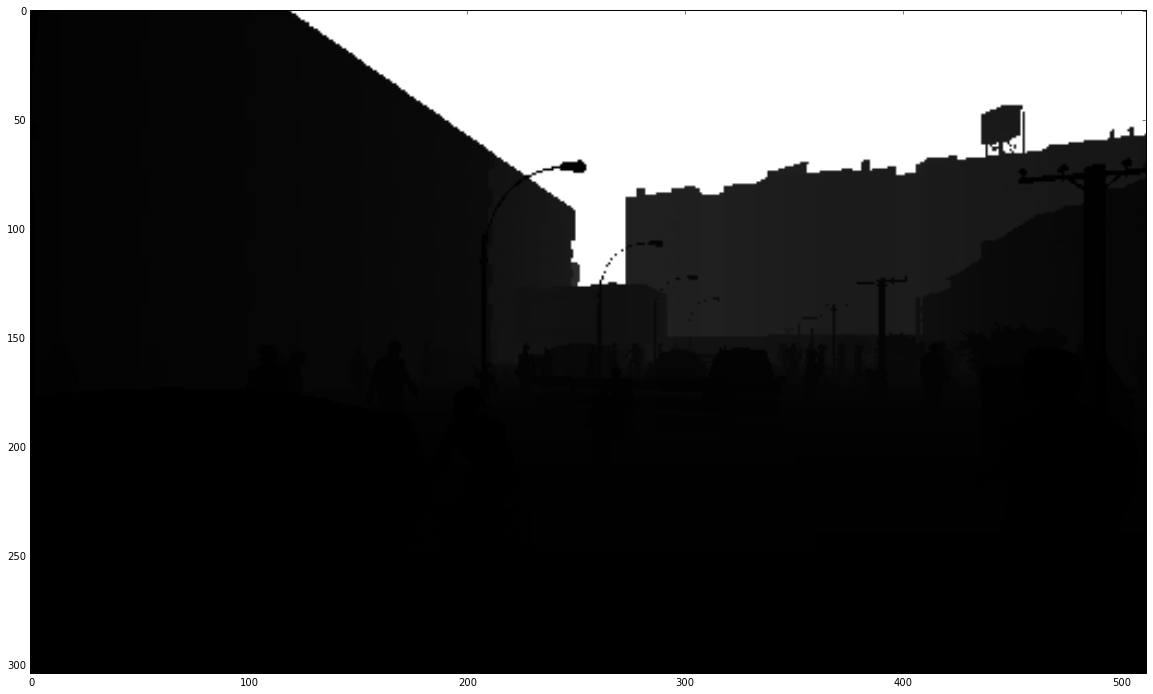

In [69]:
plt.figure(figsize=(20,20))
plt.imshow(tmp2, cmap='gray')
plt.show()

In [71]:
tmp2.max()

655

In [72]:
tmp2.min()

2

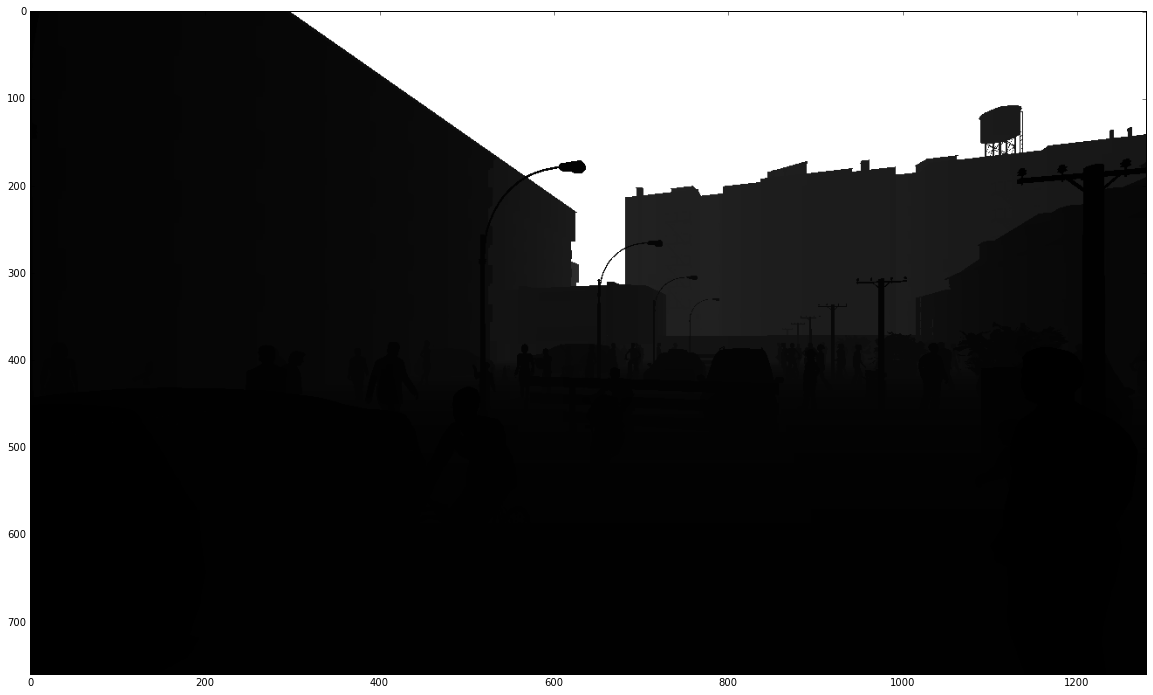

In [23]:
depth = cv2.imread(depth_path)
plt.figure(figsize=(20,20))
plt.imshow(depth)
plt.show()

In [98]:
test = cv2.imread('/media/hpc4_Raid/dsungatullina/transfer-to-zhores/SYNTHIA/RAND_CITYSCAPES/Depth_512x304/train/0000000.png', cv2.IMREAD_UNCHANGED)

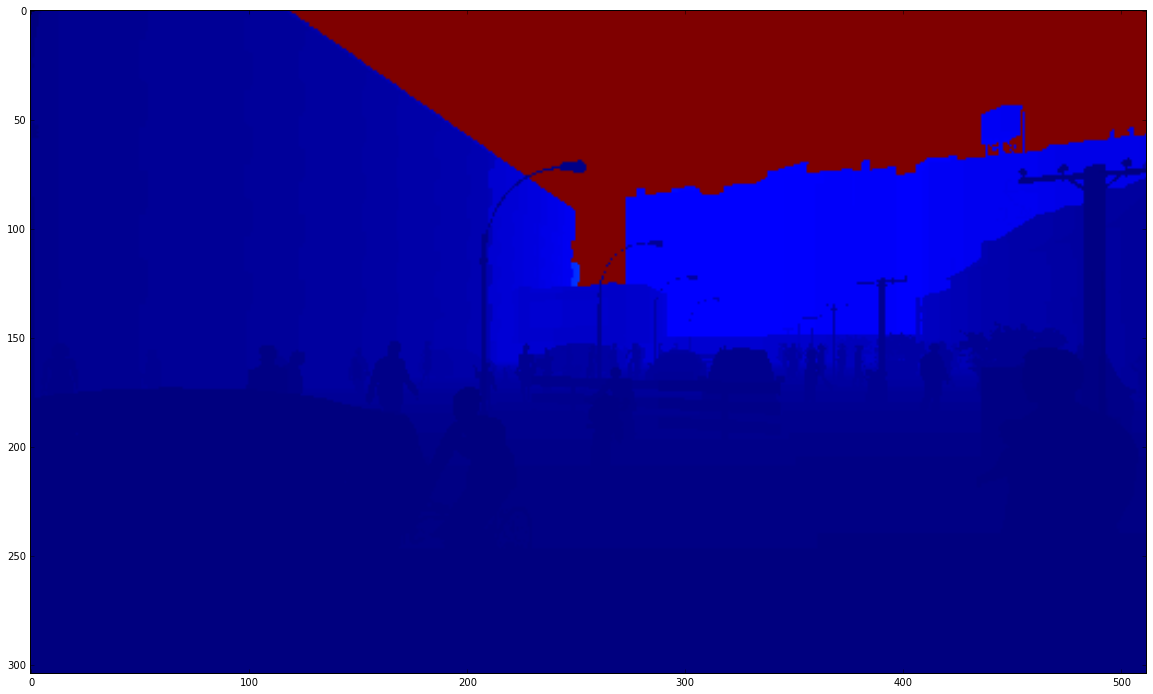

In [102]:
plt.figure(figsize=(20,20))
plt.imshow(test)
plt.show()

In [100]:
test.max()

655

In [101]:
test.min()

2

In [134]:
disp_path = '/media/hpc4_Raid/dsungatullina/disparity/train/aachen/aachen_000005_000019_disparity.png'

In [135]:
disparity = cv2.imread(disp_path, cv2.IMREAD_UNCHANGED).astype(np.float32)
disparity[disparity > 0] = (disparity[disparity > 0] - 1) / 256.0
depth = np.zeros(disparity.shape)
depth[disparity>0] = (0.209313 * 2262.52) / disparity[disparity>0]
depth = grey_closing(depth, size=(7,7))
depth_resized = cv2.resize(depth, (512, 256), interpolation=cv2.INTER_NEAREST) 

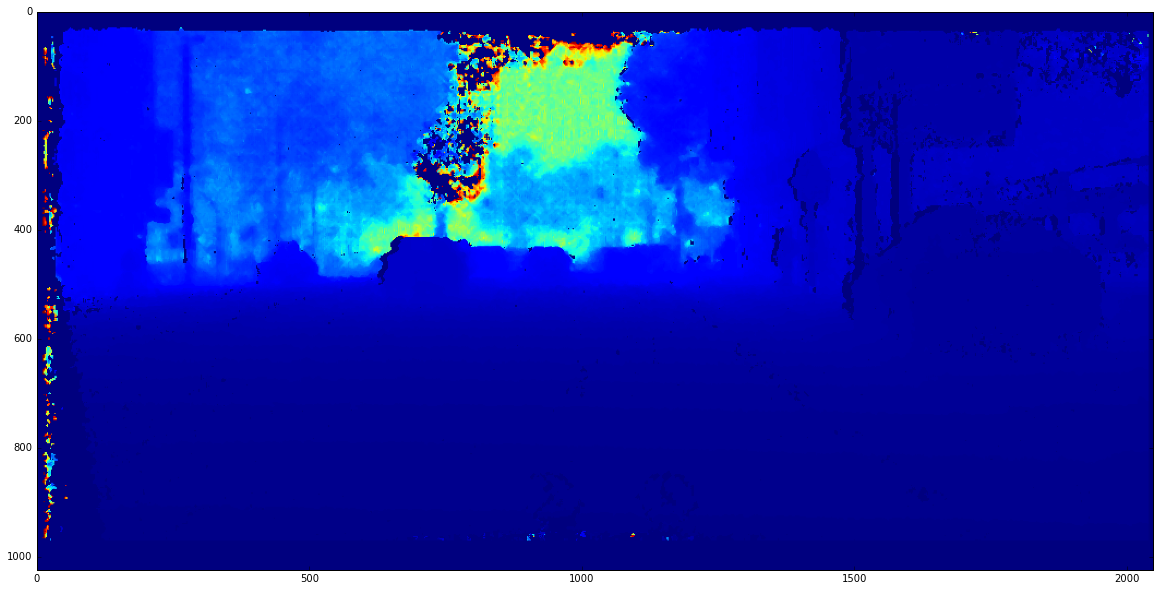

In [136]:
plt.figure(figsize=(20,20))
plt.imshow(depth)
plt.show()

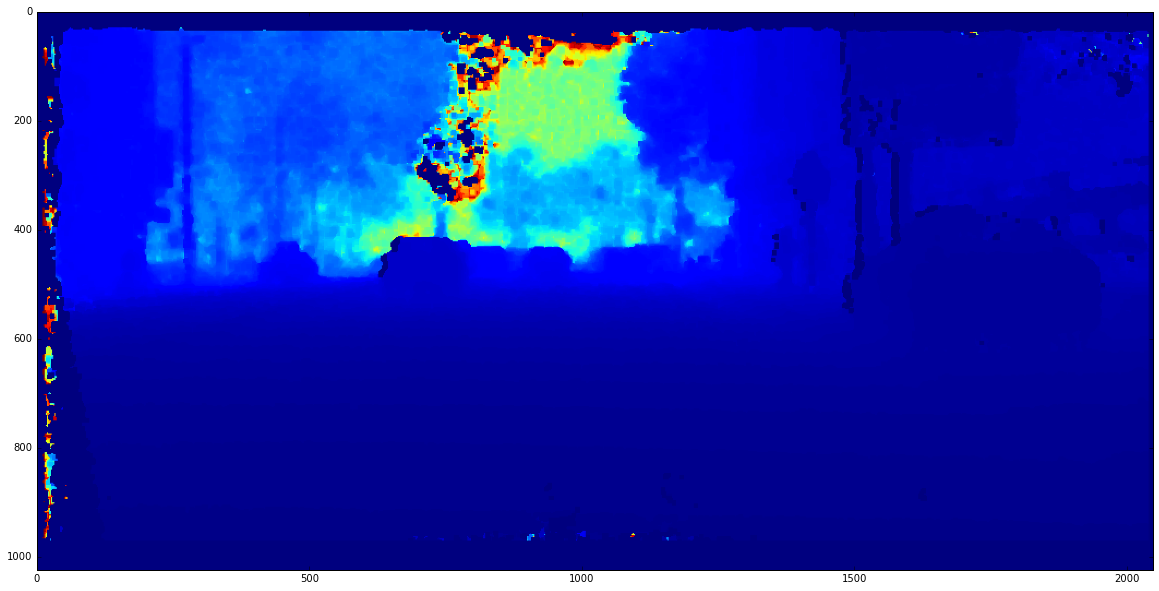

In [137]:
plt.figure(figsize=(20,20))
plt.imshow(depth1)
plt.show()

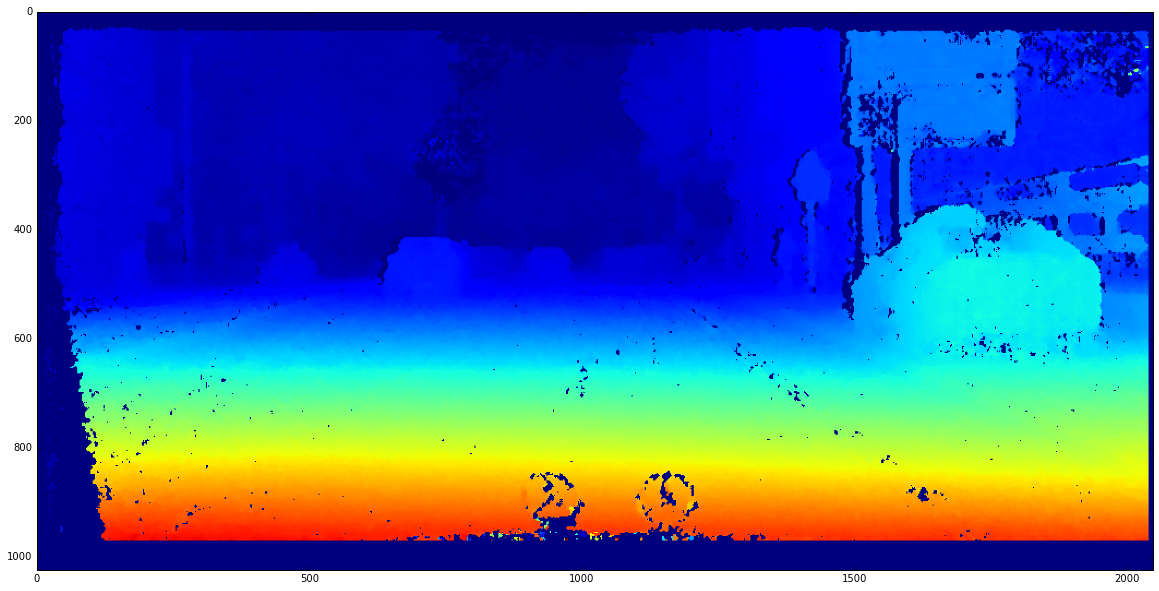

In [138]:
plt.figure(figsize=(20,20))
plt.imshow(disparity)
plt.show()

In [139]:
depth1.max(), depth1.min(), depth1.mean()

(473.5748596191406, 0.0, 41.38256440849909)

(0.0, 41.464885556819354, 473.5748596191406)


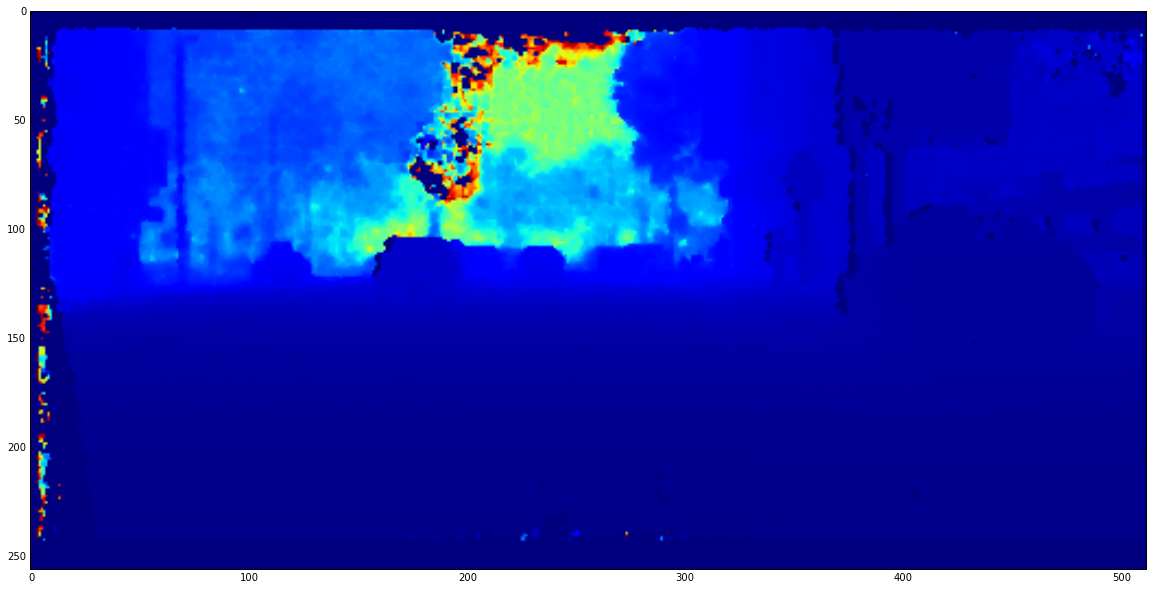

In [145]:
depth1_resized = cv2.resize(depth1, (512, 256), interpolation=cv2.INTER_NEAREST) 
print(depth1_resized.min(), depth1_resized.mean(), depth1_resized.max())
plt.figure(figsize=(20,20))
plt.imshow(depth1_resized)
plt.show()

(0.0, 41.38256440849909, 466.3994903564453)


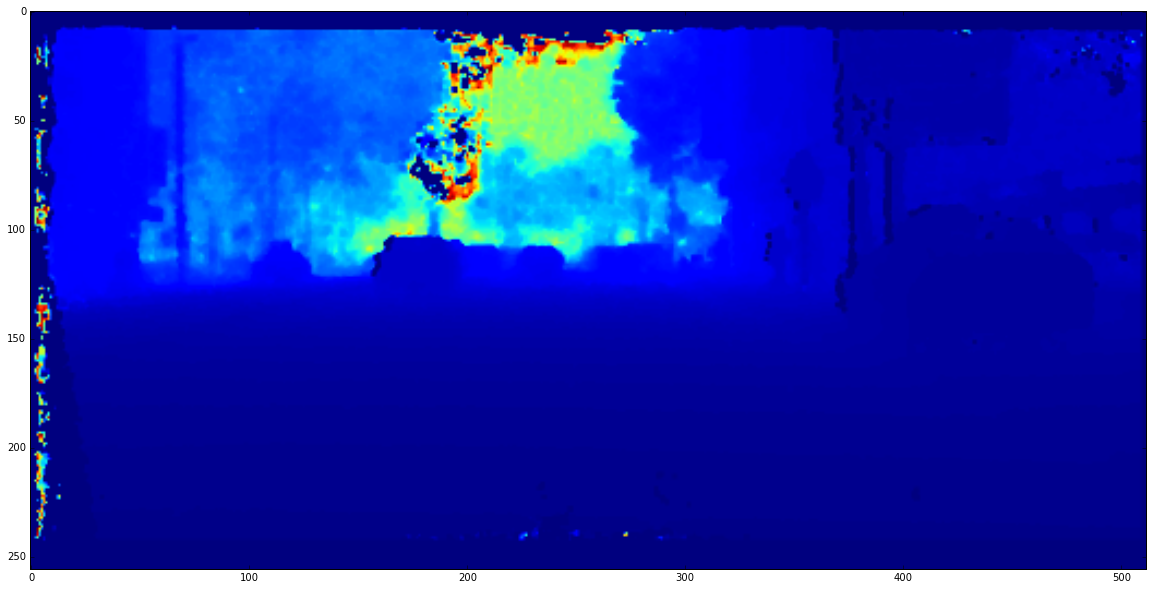

In [143]:
depth1_resized = cv2.resize(depth1, (512, 256), interpolation=cv2.INTER_LINEAR) 
print(depth1_resized.min(), depth1_resized.mean(), depth1_resized.max())
plt.figure(figsize=(20,20))
plt.imshow(depth1_resized)
plt.show()

In [50]:
disparity.shape

(1024, 2048)

In [51]:
disparity.max()

32257.0

In [52]:
disparity.min()

0.0

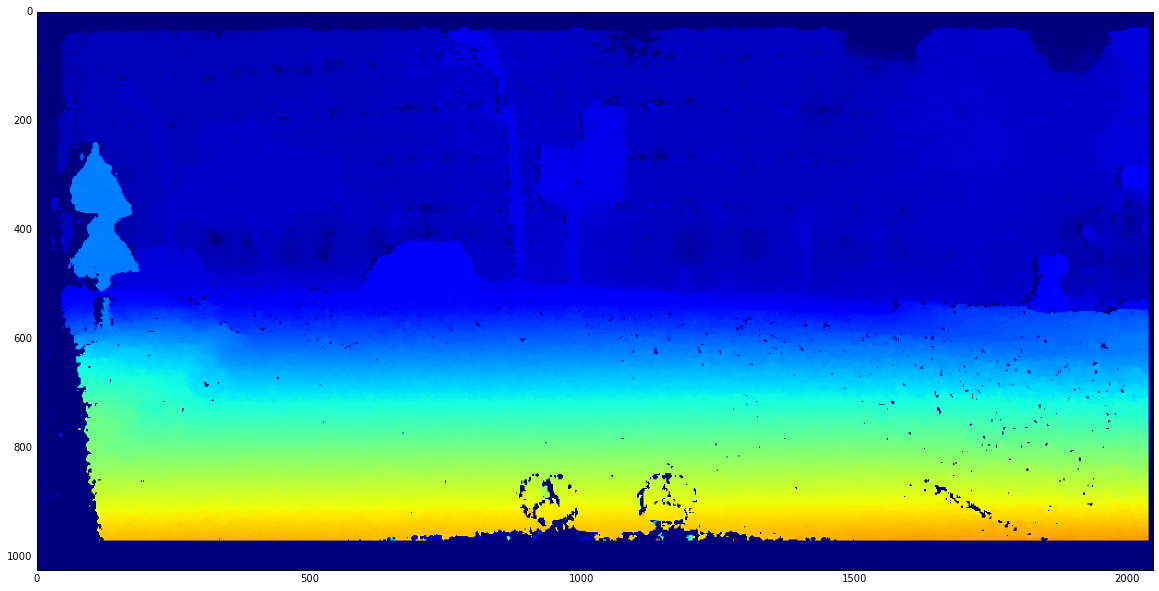

In [53]:
plt.figure(figsize=(20,20))
plt.imshow(disparity)
plt.show()

In [54]:
disparity[disparity > 0] = (disparity[disparity > 0] - 1) / 256.0

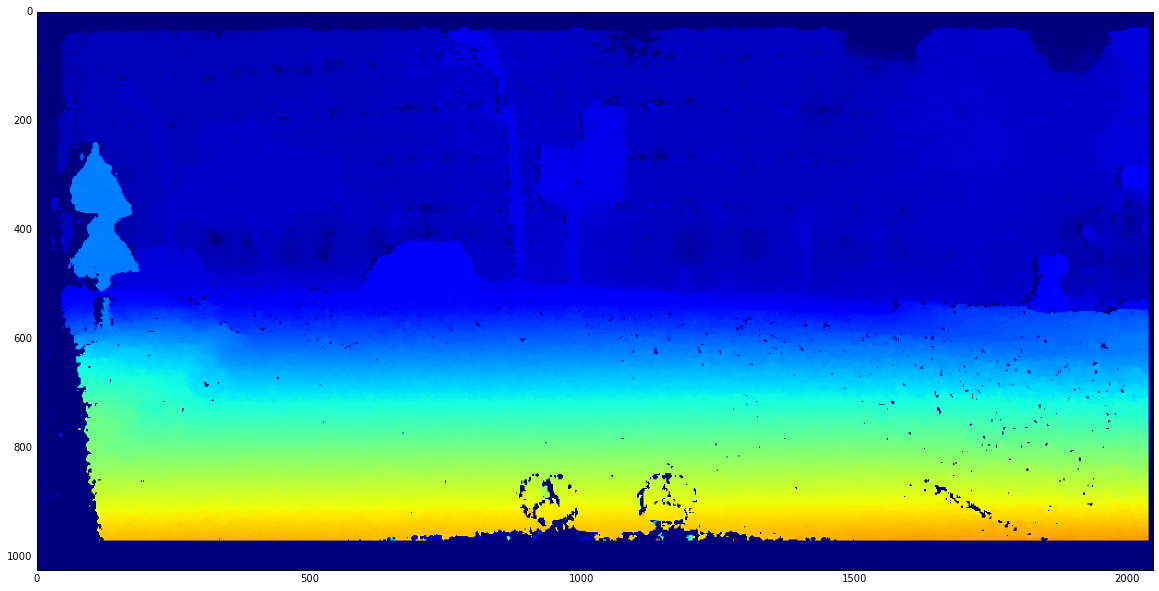

In [55]:
plt.figure(figsize=(20,20))
plt.imshow(disparity)
plt.show()

In [60]:
depth = np.zeros(disparity.shape)

In [61]:
depth.shape

(1024, 2048)

In [62]:
depth[disparity>0] = (0.209313 * 2262.52) / disparity[disparity>0]

In [63]:
depth.shape

(1024, 2048)

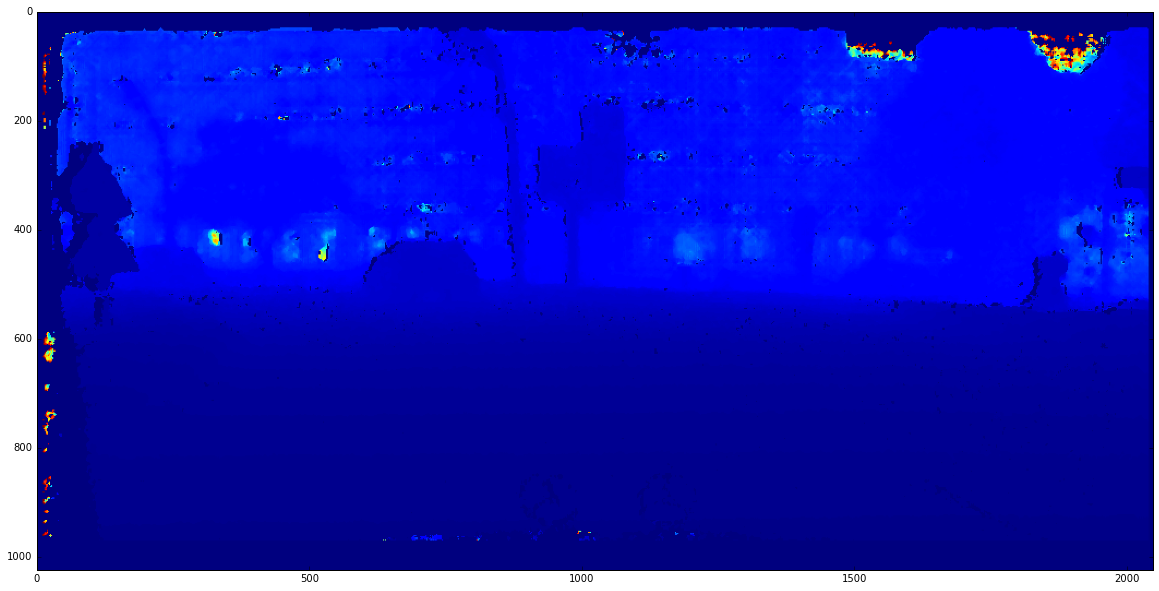

In [64]:
plt.figure(figsize=(20,20))
plt.imshow(depth)
plt.show()

In [65]:
depth.min()

0.0

In [66]:
depth.max()

473.5748596191406

In [67]:
depth.mean()

33.347674663751604

In [ ]:
img_disp_name = '/data/Cityscapes/disparity/train/aachen/aachen_000000_000019_disparity.png'
img_d = cv2.imread(img_disp_name, cv2.IMREAD_UNCHANGED).astype(np.float32)
img_d[img_d > 0] = (img_d[img_d > 0] - 1) / 256

disp = img_d[270, 106]
print(disp)
depth = (0.209313 * 2262.52) / disp
print(depth)

In [70]:
from scipy.ndimage.morphology import grey_closing

In [72]:
test_img = grey_closing(depth, size=(10,10))

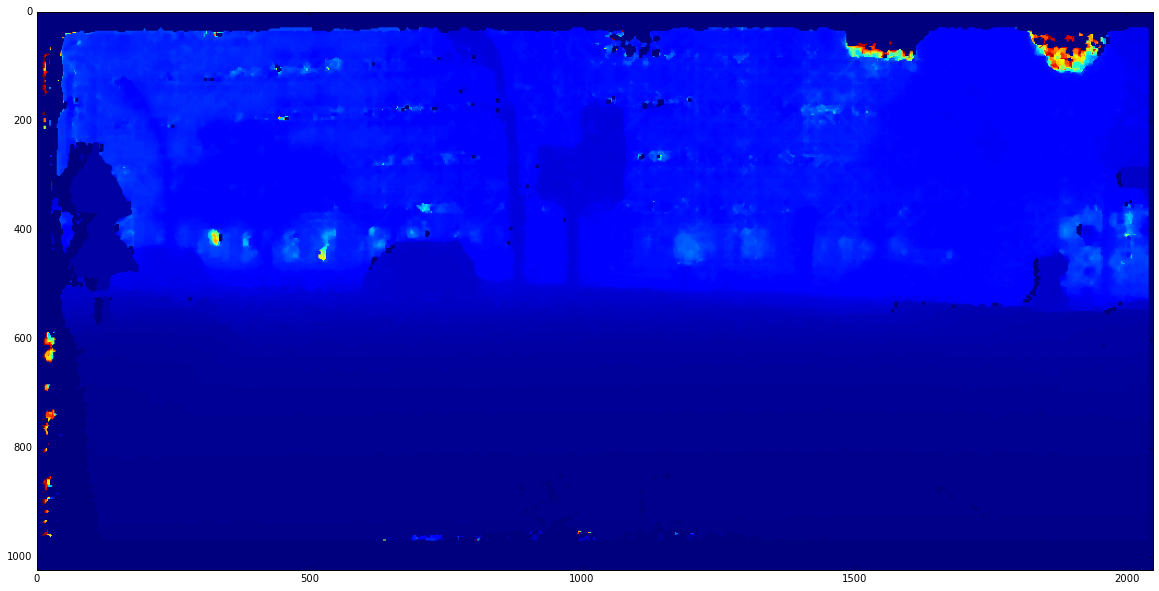

In [73]:
plt.figure(figsize=(20,20))
plt.imshow(test_img)
plt.show()

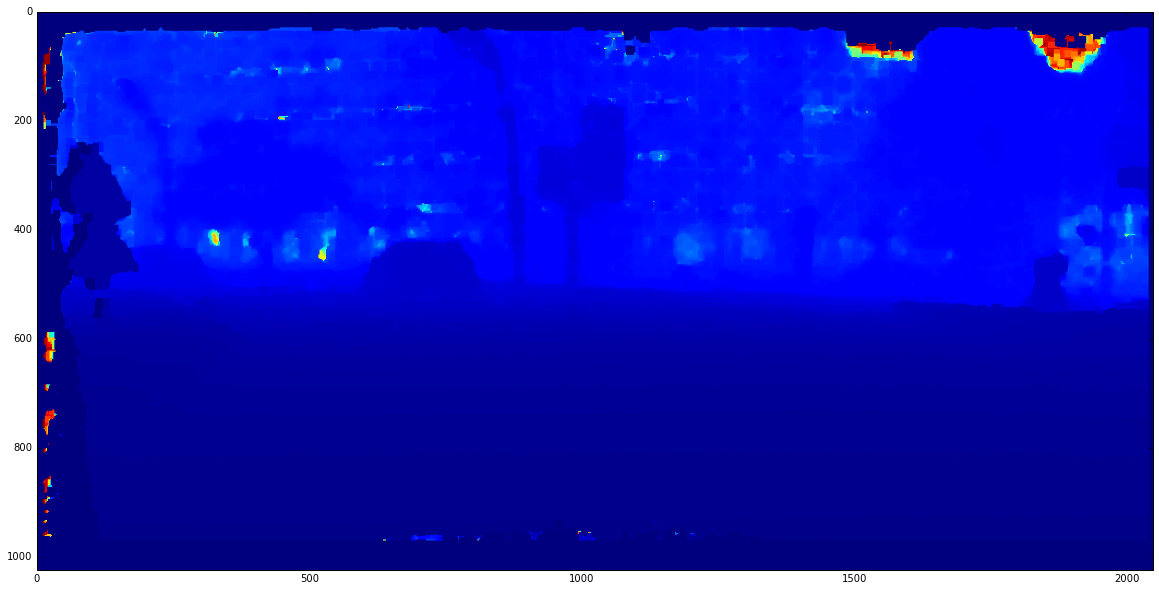

In [77]:
test_img = grey_closing(depth, size=(12,12))
plt.figure(figsize=(20,20))
plt.imshow(test_img)
plt.show()

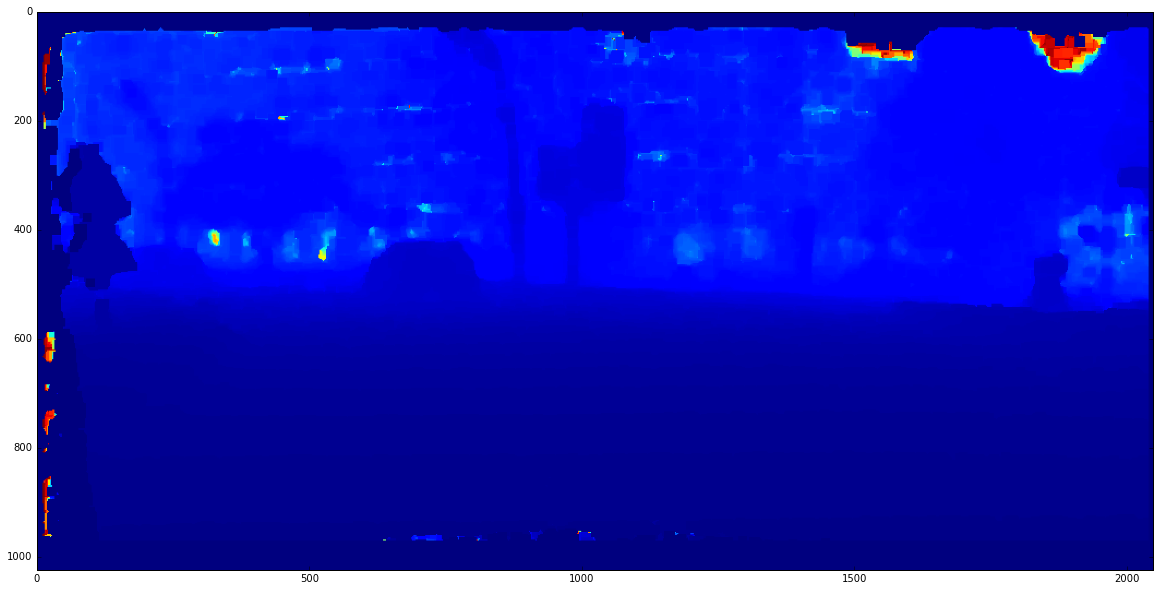

In [78]:
test_img = grey_closing(depth, size=(15,15))
plt.figure(figsize=(20,20))
plt.imshow(test_img)
plt.show()

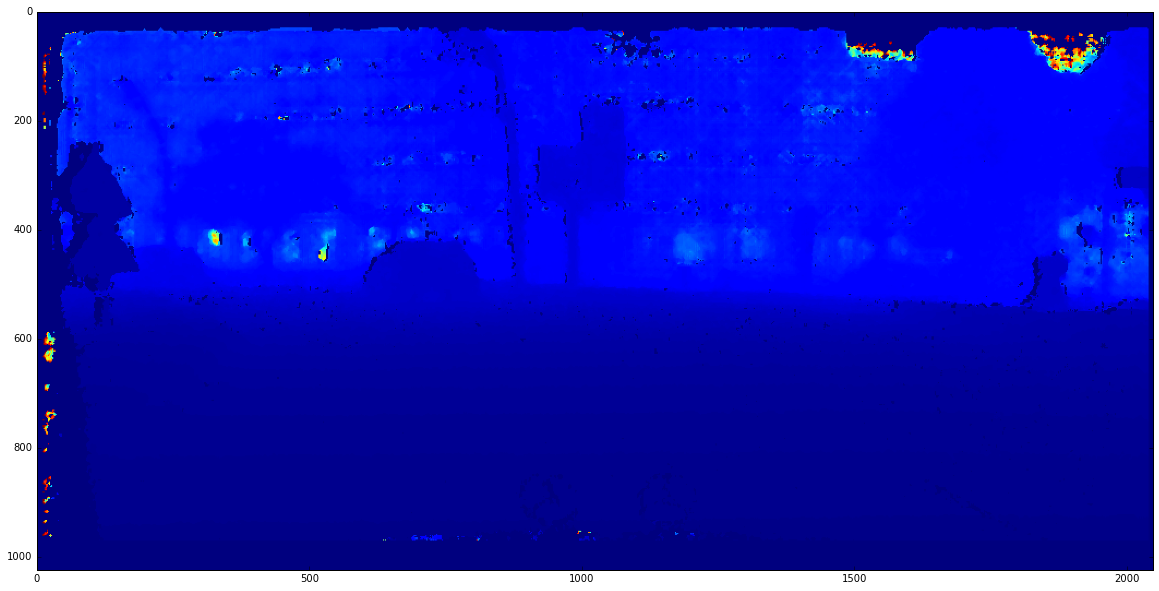

In [79]:
plt.figure(figsize=(20,20))
plt.imshow(depth)
plt.show()

In [20]:
disparity.max()

126

In [21]:
disparity.min()

0

In [22]:
disparity = disparity / 256.0

In [ ]:
depth = baseline * focal / disparity

In [24]:
depth = 0.22 * 2262 / (2048*(disparity+000000.1))

In [ ]:
0.54 * 721 / (1242 * disp)

In [ ]:
baseline is 0.22m and the focal is 2262 for a width of 2048.

In [26]:
depth.max()

2.4298828125

In [27]:
depth.min()

0.41032321899736146

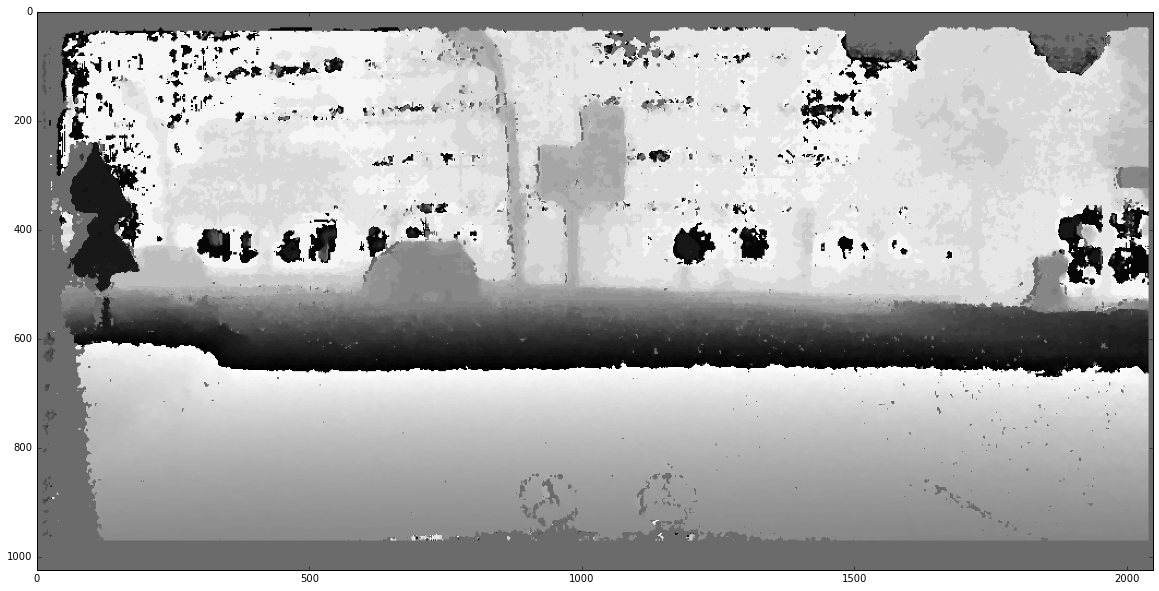

In [25]:
plt.figure(figsize=(20,20))
plt.imshow(depth)
plt.show()

In [14]:
depth.mean()

0.32207313793902975